### A quickstart to numba with some benchmarks:

In [ ]:
from numba import njit
import numpy as np

@njit(fastmath=True)
def montecarlo_pi(n):
    count = 0
    for i in range(n):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 < 1:
            count += 1
    return 4 * count / n    

print(montecarlo_pi(100000000))

In [ ]:
import numpy as np
import numba
from time import time

# Define a more complex operation in pure Python
def complex_operation_python(a, b):
    result = np.empty_like(a)
    for i in range(a.size):
        result[i] = a[i] * b[i] + a[i] - b[i]
    return result

# Define the same operation using Numba's @jit decorator
@numba.jit(nopython=True, fastmath=True)
def complex_operation_numba(a, b):
    result = np.empty_like(a)
    for i in range(a.size):
        result[i] = a[i] * b[i] + a[i] - b[i]
    return result

# Generate large random vectors for testing
vector_size = 100000000
a = np.random.rand(vector_size)
b = np.random.rand(vector_size)

# Measure the execution time of both functions
# Measure time for pure Python function
start_time = time()
result_python = complex_operation_python(a, b)
python_time = time() - start_time

# Run the Numba function once to trigger compilation
complex_operation_numba(a, b)

# Measure time for Numba-accelerated function
start_time = time()
result_numba = complex_operation_numba(a, b)
numba_time = time() - start_time

# Print the results
print(f"Pure Python time: {python_time:.6f} seconds")
print(f"Numba time: {numba_time:.6f} seconds")

In [ ]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.perf_counter()
go_fast(x)
end = time.perf_counter()
print("Elapsed (with compilation) = {}s".format((end - start)))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE, way faster.
start = time.perf_counter()
go_fast(x)
end = time.perf_counter()
print("Elapsed (after compilation) = {}s".format((end - start)))

### Some simulations for Finance:

In [ ]:
#Create a random walk simulation with a for loop
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from time import time

n_simulations = int(input("Enter the number of simulations: ")) #we choose the number of simulations via input

@njit(fastmath=True, parallel=True)
def RandomWalkGenerator(n):
    x = np.zeros(n)
    for i in range(1, n): #for loop that iterates from the second element to the last
        x[i] = x[i-1] + np.random.normal(0,1)
    return x

v1 = RandomWalkGenerator(n_simulations) #COMPILE it first!


#--------------------------------------------------------------
#With numba via CACHING so way faster:
start_time_numba = time()
v1 = RandomWalkGenerator(n_simulations)
end_time_numba = time()
print(f"Numba time for {n_simulations} simulations: {end_time_numba - start_time_numba} seconds")
#--------------------------------------------------------------
#Without numba:
def RandomWalkGenerator(n):
    x = np.zeros(n)
    for i in range(1, n):
        x[i] = x[i-1] + np.random.normal(0,1)
    return x

python_start_time = time()
v2 = RandomWalkGenerator(n_simulations)
python_end_time = time()
print(f"Python time for {n_simulations} simulations: {python_end_time - python_start_time} seconds")

#### Here's a handy tool for everybody who wants to backtest on multiple randomwalks:
We generate a number of random walks with the same test, allowing someone to backtest on a 2 dimensional array of random prices.

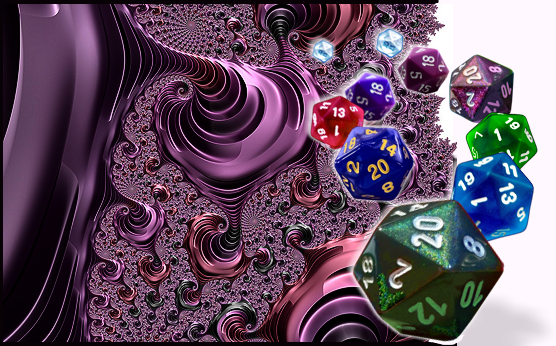

In [ ]:
#Create a function that creates a number of random walks
import numpy as np
from time import time

#----------------parameters----------------
n_randomwalks = int(input("Enter the number of random walks: ")) #we choose the number of random walks via input
n_length = int(input("Enter the length of the random walks: ")) #we choose the length of the random walks via input
#-----------------------------------------


#----------------function------------------
def RandomWalksGen(n_randomwalks, n_length):
    randomwalks = np.zeros((n_length, n_randomwalks)) #we create a 2 dimensional array with n_length rows and n_randomwalks columns
    randomwalks[0] = 1 #we set the first element of each random walk to 1 so they start from the same point
    for i in range(1, len(randomwalks)): 
        randomwalks[i] = randomwalks[i-1] + np.random.normal(0,1, n_randomwalks) #we iterate on all rows of the 2 dimensional array
                                                                                 #and we set the number of random values we want to generate
                                                                                 #to n_randomwalks so that each column will have a different random walk
    return randomwalks
#------------------------------------------

#-----------------execution and benchmarking-----------------
start_python_time = time()
v1 = RandomWalksGen(n_randomwalks, n_length)
end_python_time = time()
print(f"Python time for {n_randomwalks} random walks of length {n_length}: {end_python_time - start_python_time} seconds")

#--------------plotting---------------------
import matplotlib.pyplot as plt

wanna_plot = input("Do you want to plot the random walks? (yes/no): ") #we ask the user if he wants to plot the random walks

if wanna_plot == "yes":
    plt.figure(figsize=(10,6)) #set the figsize of the plot
    plt.plot(v1)
    plt.title(f"Our {n_randomwalks} generated random walks")
    plt.xlabel("Number of steps")
    plt.ylabel("Value")
    plt.show()

In [1]:
#NOW WE DO THE SAME WITH NUMBA AND BENCHMARK THE TWO FUNCTIONS;

from numba import njit
import numpy as np
from time import time



#----------------parameters----------------
n_randomwalks = int(input("Enter the number of random walks: ")) #we choose the number of random walks via input
n_length = int(input("Enter the length of the random walks: ")) #we choose the length of the random walks via input
#-----------------------------------------


#----------------function------------------
@njit(fastmath=True, parallel=False)
def RandomWalksGen(n_randomwalks, n_length):
    randomwalks = np.zeros((n_length, n_randomwalks)) #we create a 2 dimensional array with n_length rows and n_randomwalks columns
    randomwalks[0] = 1 #we set the first element of each random walk to 1 so they start from the same point
    for i in range(1, len(randomwalks)): 
        randomwalks[i] = randomwalks[i-1] + np.random.normal(0,1, n_randomwalks) #we iterate on all rows of the 2 dimensional array
                                                                                 #and we set the number of random values we want to generate
                                                                                 #to n_randomwalks so that each column will have a different random walk
    return randomwalks
#------------------------------------------


v1 = RandomWalksGen(n_randomwalks, n_length) #FOR COMPILING ONLY!

#--------------------------------------------------------------
#With numba via CACHING so way faster:
start_time_numba = time()
v1 = RandomWalksGen(n_randomwalks, n_length)
end_time_numba = time()
print(f"Numba time for {n_randomwalks} with {n_length} rows random walks: {end_time_numba - start_time_numba} seconds")


#-----------WITH NATIVE PYTHON FUNCTION----------------

def RandomWalksGenPython(n_randomwalks, n_length):
    randomwalks = np.zeros((n_length, n_randomwalks)) #we create a 2 dimensional array with n_length rows and n_randomwalks columns
    randomwalks[0] = 1 #we set the first element of each random walk to 1 so they start from the same point
    for i in range(1, len(randomwalks)): 
        randomwalks[i] = randomwalks[i-1] + np.random.normal(0,1, n_randomwalks) #we iterate on all rows of the 2 dimensional array
                                                                                 #and we set the number of random values we want to generate
                                                                                 #to n_randomwalks so that each column will have a different random walk
    return randomwalks


#--------------------------------------------------------------
#execute with raw python
start_time_python = time()
v1 = RandomWalksGenPython(n_randomwalks, n_length)
end_time_python = time()
print(f"Native Python time for {n_randomwalks} with {n_length} rows random walks: {end_time_python - start_time_python} seconds")




Numba time for 500 with 100000 rows random walks: 0.998232364654541 seconds
Native Python time for 500 with 100000 rows random walks: 1.2842986583709717 seconds
